In [2]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc, confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
df_og = pd.read_csv("bank.csv")
df =df_og.copy()

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Check columns

In [5]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [6]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

# Check null values

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

__No Null Values!__

In [8]:
df.duplicated().sum()

0

__No duplicates__

# Deposit column composition

In [9]:
df['deposit'].value_counts()/df.shape[0]

no     0.52616
yes    0.47384
Name: deposit, dtype: float64

Conclusion - __Balanced data__, as % of yes and no categories are very close

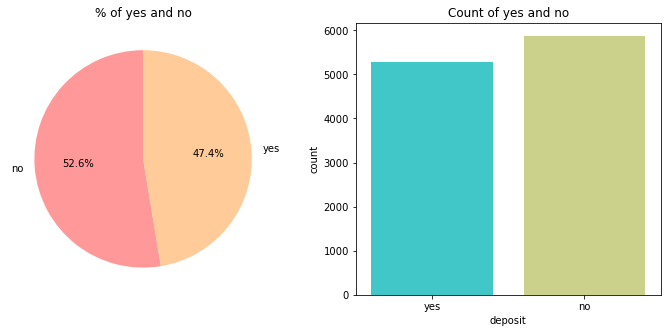

In [10]:
plt.figure(figsize=(12,5))
comp = df['deposit'].value_counts()
plt.subplot(1,2,(1,1))
plt.pie(comp.values,labels=comp.index,autopct="%1.1f%%",colors=['#ff9999','#ffcc99'], startangle=90)
plt.title('% of yes and no')
plt.subplot(1,2,(2,2))
sns.countplot(df['deposit'],palette='rainbow')
plt.title('Count of yes and no')
plt.show()

# Exploring categorical columns

#    Counts

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [12]:
cols = df.columns.values
for col in cols:
    print(col , "  : Number of unique values - ",len(df[col].unique()))


age   : Number of unique values -  76
job   : Number of unique values -  12
marital   : Number of unique values -  3
education   : Number of unique values -  4
default   : Number of unique values -  2
balance   : Number of unique values -  3805
housing   : Number of unique values -  2
loan   : Number of unique values -  2
contact   : Number of unique values -  3
day   : Number of unique values -  31
month   : Number of unique values -  12
duration   : Number of unique values -  1428
campaign   : Number of unique values -  36
pdays   : Number of unique values -  472
previous   : Number of unique values -  34
poutcome   : Number of unique values -  4
deposit   : Number of unique values -  2


In [13]:
#drop columns where count won't make sense in subplotting
count_cols = ['marital', 'education', 'default', 
       'housing', 'loan', 'contact',  'month',  'poutcome']

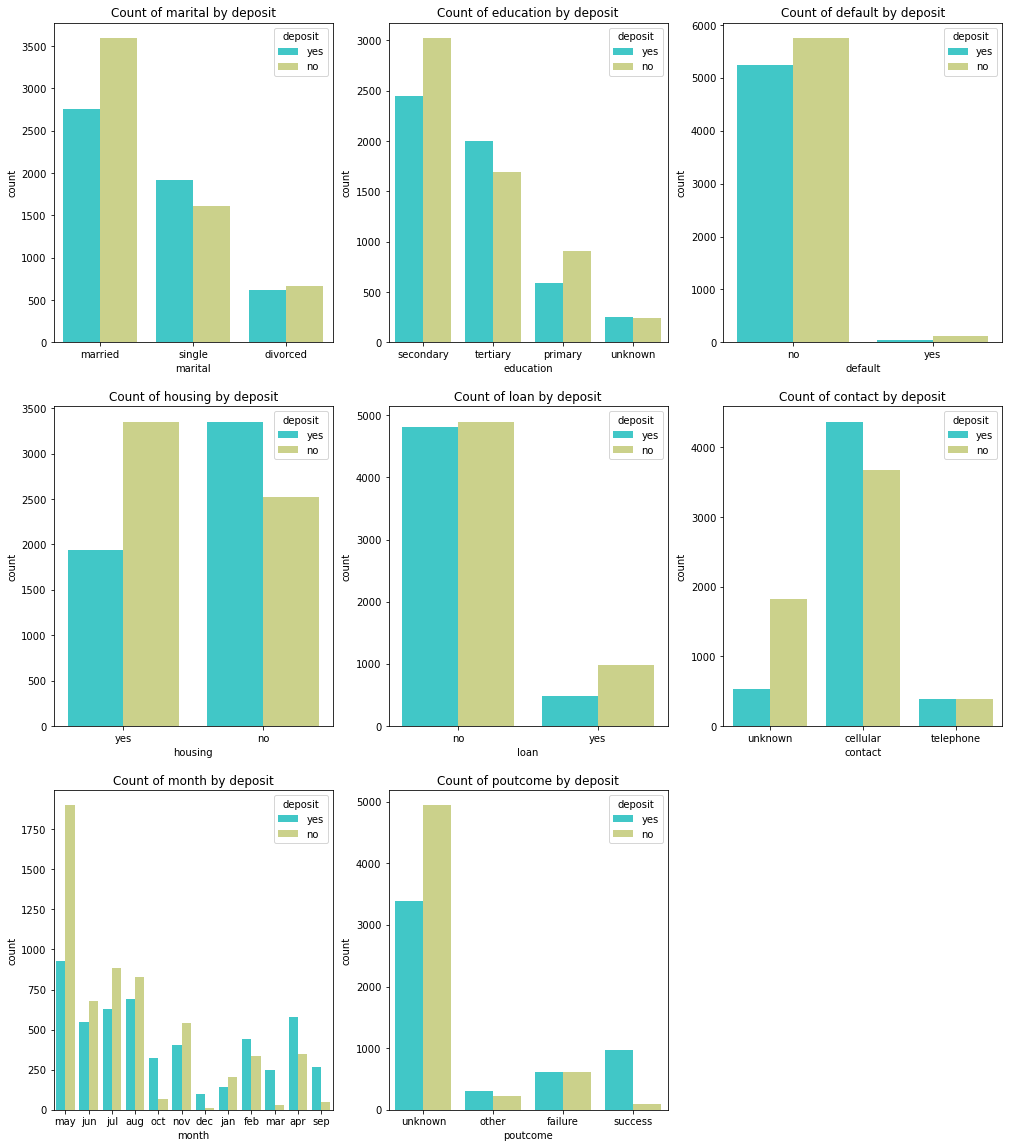

In [14]:
plt.figure(figsize=(17,20))
for i,col in enumerate(count_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(x=col,hue='deposit',data=df,palette='rainbow')
    plt.title('Count of {} by deposit'.format(col))
plt.show()


__Single people__ are more likely to subscribe to a term deposit accoun

People with __No housing loan__ are more likely to subscribe to a term deposit account

Peoplw who own a __cell phone__ are more likely to subscribe to a term deposit account

More calls placed in the first and last quarter months during previous campaigns were converted to successful outcomes while number of calls placed were higher in second and third quarter.

ALmost 50% of cases with failed outcome in previous campaign hold an account by the current campaign. Very few with successful outcome in prev campaign have with drawn their accounts in this campaign.

In [15]:
#group age into age groups for better visualization
def handle_age_groups(value):
    if value in range (0,18):
        return '0-17'
    elif value in range (18,30):
        return '18-30'
    elif value in range (30,40):
        return '30-39'
    elif value in range (40,50):
        return '40-49'
    elif value in range (50,60):
        return '50-59'
    elif value in range (60,70):
        return '60-69'
    elif value in range (70,100):
        return '70-100'
    else:
        return np.nan

In [16]:
#create new column
df['age_group'] = df['age'].apply(handle_age_groups)

In [17]:
df['age_group'] 

0        50-59
1        50-59
2        40-49
3        50-59
4        50-59
         ...  
11157    30-39
11158    30-39
11159    30-39
11160    40-49
11161    30-39
Name: age_group, Length: 11162, dtype: object

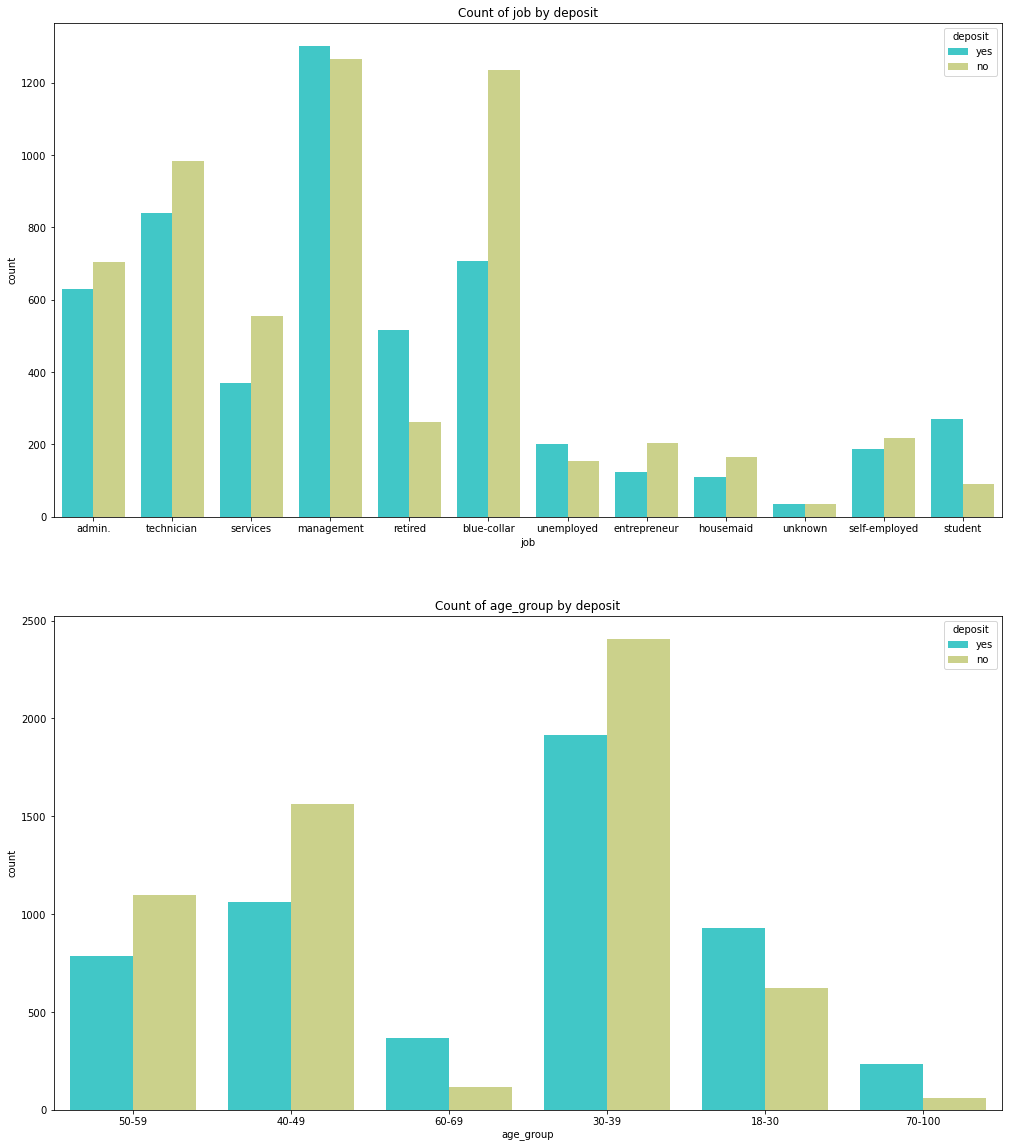

In [18]:
#larger count plots
larger_cols = ['job','age_group']
plt.figure(figsize=(17,20))
for i,col in enumerate(larger_cols):
    plt.subplot(2,1,i+1)
    sns.countplot(x=col,hue='deposit',data=df,palette='rainbow')
    plt.title('Count of {} by deposit'.format(col))
plt.show()

Both plots show that __students /age-group__ -> 18-30 are more likely to subscribe and the retired age group from __60-100__ are more likely to say yes.

# Numerical Columns

In [19]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'deposit',
       'age_group'], dtype=object)

In [20]:
num_cols = ['age','balance', 'day', 'duration','campaign', 'pdays', 'previous']

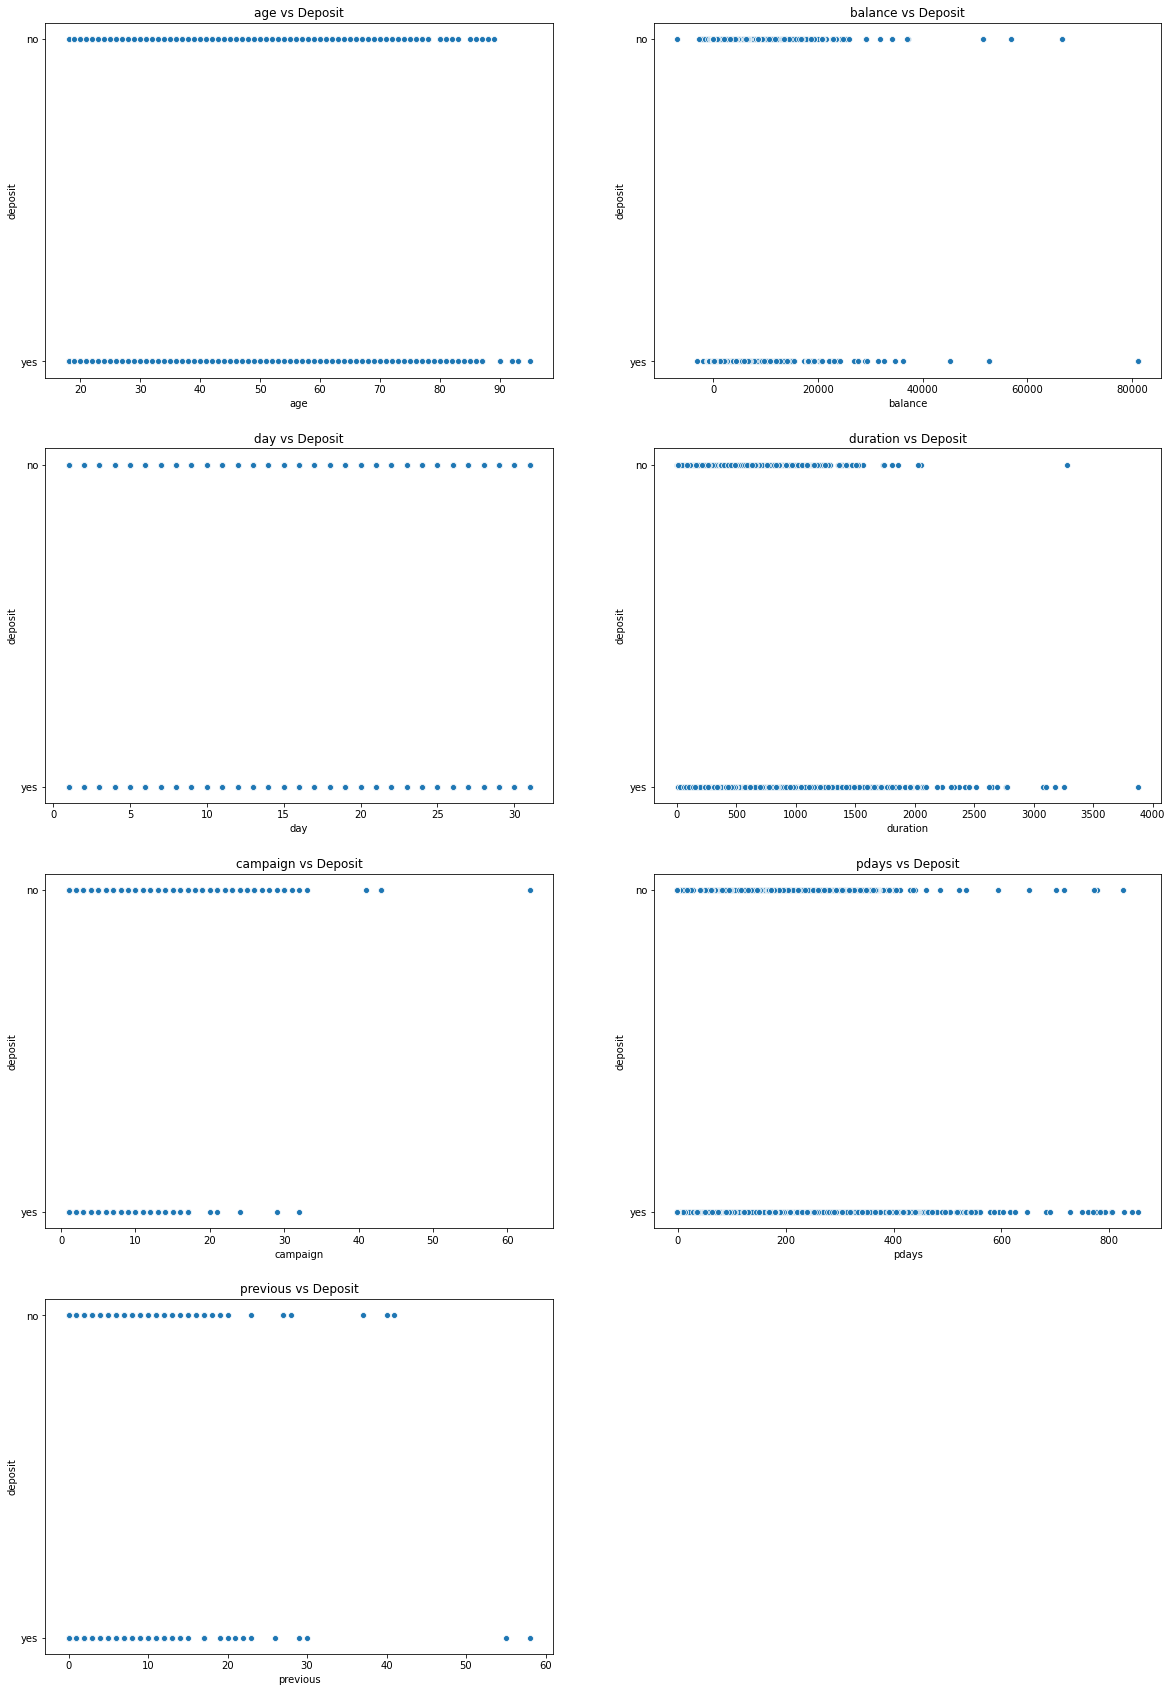

In [21]:
plt.figure(figsize=(20,30))
for i,col in enumerate(num_cols):
    plt.subplot(4,2,i+1)
    sns.scatterplot(x=col,y='deposit',data=df,palette='rainbow')
    plt.title("{} vs Deposit".format(col))
    
plt.show()

More the more __duration__ more the chances of subscribing to the account.

Lower __campaign__ calls increases the chances.

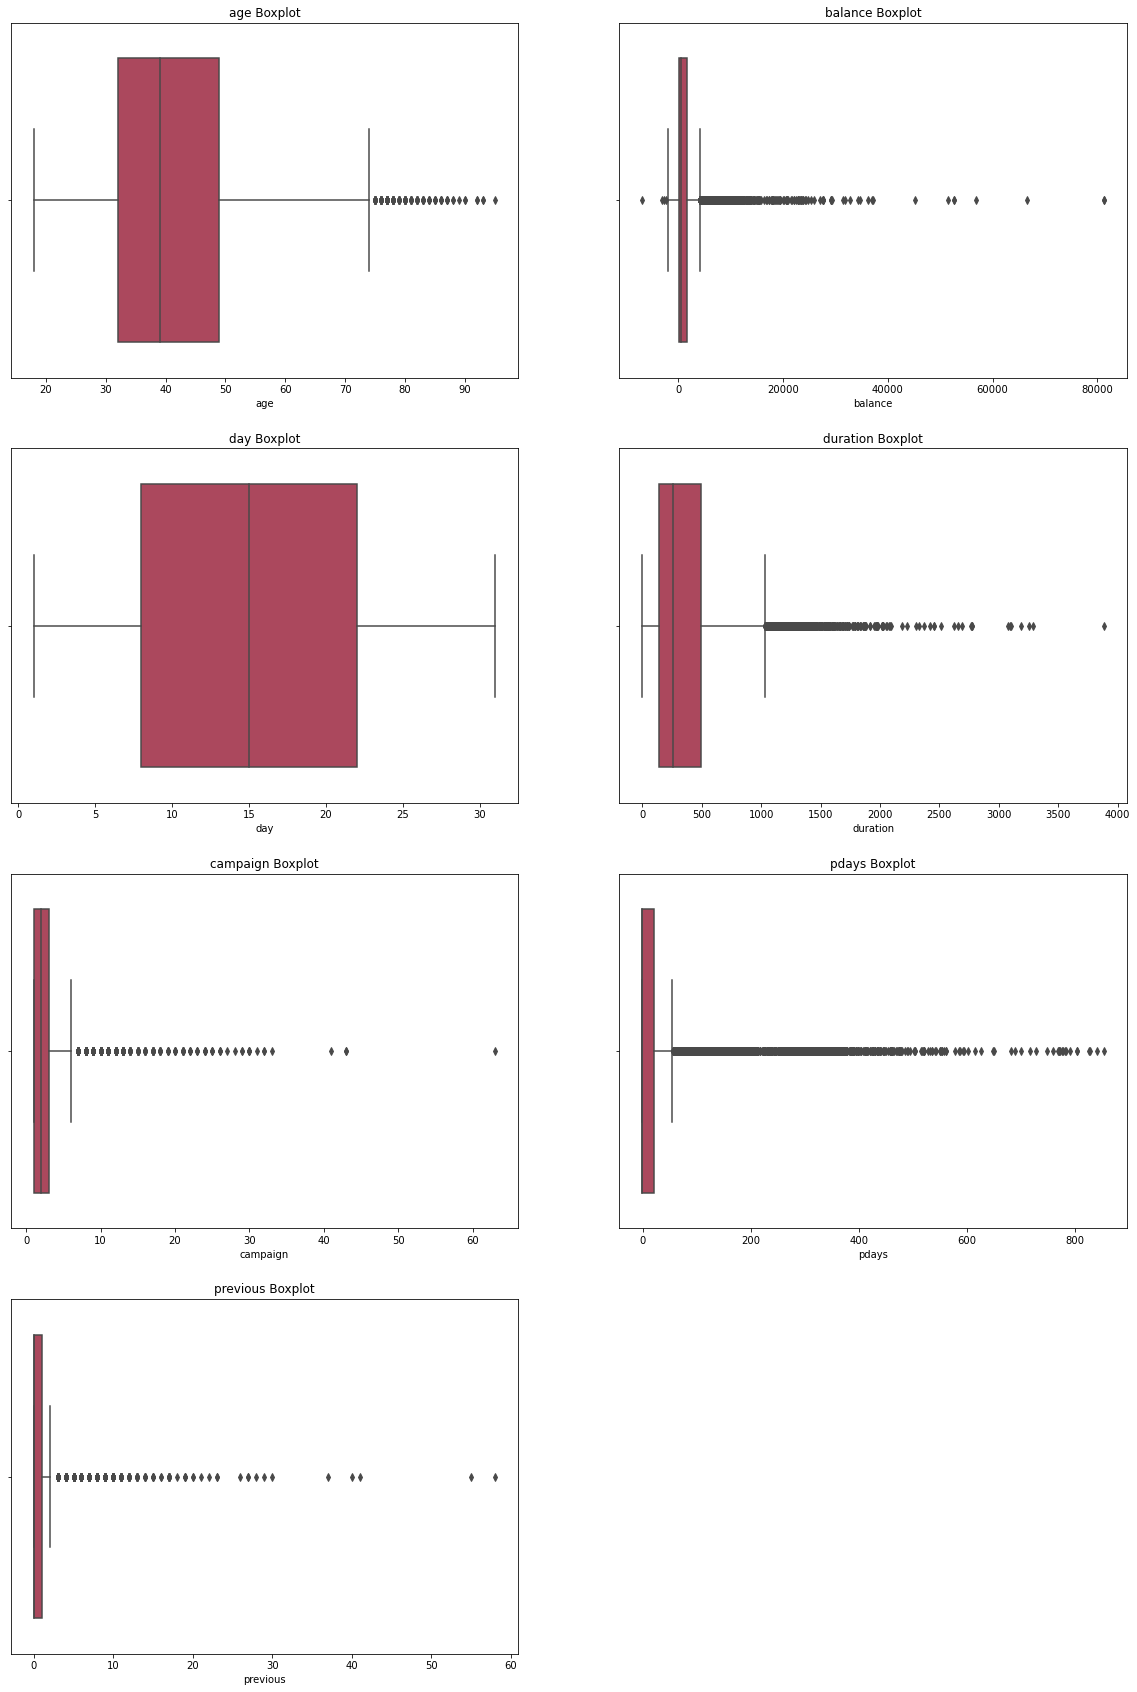

In [22]:
plt.figure(figsize=(20,30))
for i,col in enumerate(num_cols):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=col,data=df,palette='inferno')
    plt.title("{} Boxplot".format(col))
    
plt.show()

#TODO - check outlier conclusion

Columns like __day__ do not seem to contain useful information and can be __dropped.__

__Age__ column seem to be balanced.

Columns like __pdays ,previous,duration ,balance and campaign__ contain __outliers.__

# Correlation

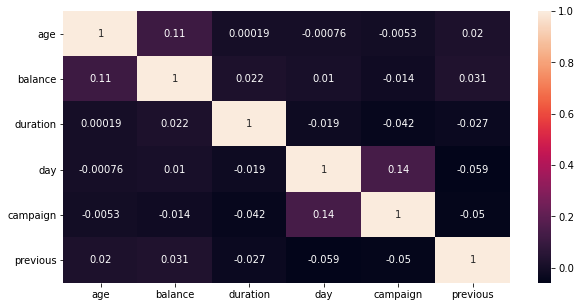

In [23]:
corr_columns = ['age','balance','duration','day','campaign','previous']
plt.figure(figsize=[10,5])
sns.heatmap(data = df[corr_columns].corr(),annot=True)
plt.show()

# Process text columns

In [24]:
#get text containing columns
text_columns = ['job','marital','education','contact','default','housing','loan','month','poutcome','deposit']

In [25]:
data_df = df_og.copy()

In [26]:
#call label encoder, encode text entries to categorical variables
le = preprocessing.LabelEncoder()
for column in text_columns:
    data_df[column]=le.fit_transform(data_df[column])
data_df.head()   

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [27]:
#Get independent and dependent columns x and Y
x = data_df.drop(['deposit'],axis=1).values
Y= data_df['deposit'].values

In [77]:
#Split the data into train and test
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=0.2)

# Build a decision tree

# Tree with depth of 2

In [78]:
model_dt_2 = DecisionTreeClassifier(max_depth=2,criterion='gini',random_state=1)
model_dt_2.fit(x_train,Y_train)
model_dt_2_score_train = model_dt_2.score(x_train,Y_train)
print("Training Score : {0:.2f}%".format(model_dt_2_score_train*100))
model_dt_2_score_test = model_dt_2.score(x_test,Y_test)
print("Testing Score : {0:.2f}%".format(model_dt_2_score_test*100))

Training Score : 71.02%
Testing Score : 71.56%


# Tree with depth of 4

In [79]:
model_dt_4 = DecisionTreeClassifier(max_depth=4,criterion='gini',random_state=1)
model_dt_4.fit(x_train,Y_train)
model_dt_4_score_train = model_dt_4.score(x_train,Y_train)
print("Training Score : {0:.2f}%".format(model_dt_4_score_train*100))
model_dt_4_score_test = model_dt_4.score(x_test,Y_test)
print("Testing Score : {0:.2f}%".format(model_dt_4_score_test*100))

Training Score : 79.33%
Testing Score : 79.18%


# Tree with depth of 8

In [80]:
model_dt_8 = DecisionTreeClassifier(max_depth=8,criterion='gini',random_state=1)
model_dt_8.fit(x_train,Y_train)
model_dt_8_score_train = model_dt_8.score(x_train,Y_train)
print("Training Score : {0:.2f}%".format(model_dt_8_score_train*100))
model_dt_8_score_test = model_dt_8.score(x_test,Y_test)
print("Testing Score : {0:.2f}%".format(model_dt_8_score_test*100))

Training Score : 85.70%
Testing Score : 81.37%


# Tree with entropy criterion

In [82]:
model_dt_ent = DecisionTreeClassifier(max_depth=8,criterion='entropy',random_state=1)
model_dt_ent.fit(x_train,Y_train)
model_dt_ent_score_train = model_dt_ent.score(x_train,Y_train)
print("Training Score : {0:.2f}%".format(model_dt_ent_score_train*100))
model_dt_ent_score_test = model_dt_ent.score(x_test,Y_test)
print("Testing Score : {0:.2f}%".format(model_dt_ent_score_test*100))

Training Score : 85.16%
Testing Score : 82.27%


__Since Training and Testing scores are higher and close enough for tree with entropy we will evaluate the performance of this tree.__

### Predict test values with model

In [104]:
Y_predictions = model_dt_ent.predict(x_test)

#### Calculate how many 'yes' are true out of the total 'predicted yes' - RECALL RATE????


In [128]:
Y_test_when_pred1 = np.empty(1)
for i in range(len(Y_predictions)):
    if (Y_predictions[i] == 1):
            Y_test_when_pred1 = np.vstack((Y_test_when_pred1,Y_test[i]))

#np.empty() fills a random first value , get rid of it
Y_test_when_pred1 = Y_test_when_pred1[1:]

In [132]:
#flatten into an array (shape(n,1)to shape(n,0))
Y_test_when_pred1=Y_test_when_pred1.flatten()

#Count how % of  predicted 1s which  are True positives
count =0
for result in Y_test_when_pred1:
    if (result==1):#if actual  value is 1 in y test
        count=count+1;
        
print("true yes | predicted yes : {0:.2f} %".format(count*100/len(Y_test_when_pred1)))


true yes | predicted yes : 80.04 %


# Confusion Matrix and AUC curve

__Prediction probabilities__ - the probability that a particular data point falls into the underlying classes

In [152]:
#Take probabilities of only class '1' (we don't care about 0s here)
Y_pred_prob = model_dt_ent.predict_proba(x_test)[:,1]

__ROC CURVE__

In [153]:
fpr_dt, tpr_dt ,_ = roc_curve(Y_test,Y_pred_prob)
#Calculate area under ROC Curve
roc_auc_dt = auc(fpr_dt,tpr_dt)

Text(0, 0.5, 'True Positive Rate')

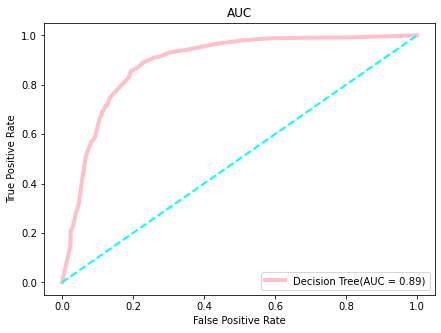

In [191]:
plt.figure(figsize=(7,5))
plt.plot(fpr_dt, tpr_dt,color='pink',lw=4,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='cyan',linestyle='--',lw=2)
plt.title('AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


__CONFUSION MATRIX__

In [197]:
conf_mat = confusion_matrix(Y_test,Y_predictions)

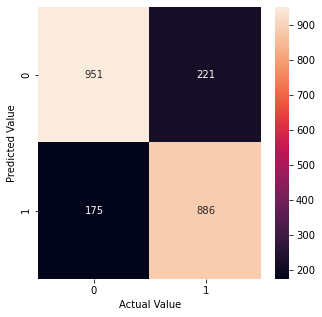

In [217]:
plt.figure(figsize=(5,5))
s=sns.heatmap(conf_mat,annot=True,fmt="0")
s.set(xlabel='Actual Value', ylabel='Predicted Value')
plt.show()

__ACCURACY SCORE__

In [225]:
#Correct predictions (0s and 1s)
accuracy_score =accuracy_score(Y_test,Y_predictions)
print("Accuracy is : {0:.2f}%".format(accuracy_score*100))

Accuracy is : 82.27%
